In [1]:
#Importar librerías
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft
import pyaudio
from IPython.display import clear_output
import random
import warnings
import pandas as pd
from random import choice
import ipywidgets as wg
from IPython.display import display
from ipywidgets import interact, interact_manual, fixed, interactive
import scipy.io.wavfile
warnings.filterwarnings("ignore")  #Ignorar warnings generados por librerías
#Importar librería creada
from mmpy import *

In [2]:
#Definir estilo
def style():
    #Tamaño imagen
    plt.rcParams['figure.figsize'] = (9, 6)
    #Tamaño textos
    plt.rcParams['axes.labelsize']=20 
    plt.rcParams['axes.titlesize']=25                           
    plt.rcParams['xtick.labelsize']=15                          
    plt.rcParams['ytick.labelsize']=15                 
    #Colores
    plt.rcParams['axes.facecolor']='beige'
    plt.rcParams['axes.color_cycle']='blue'
    plt.rcParams['axes.edgecolor']= 'blue'
    #Grilla
    plt.rcParams['axes.grid']=True  
    return plt
style()

<module 'matplotlib.pyplot' from '/Users/Camilo/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

# Función para cargar audio

In [3]:
def load(path):
    return Audio(read(path)[1])

# Get_features

In [4]:
def get_features(self):
        freq=44100
        freqpeak= abs(self.faxis[np.argmax(abs(self.y))])
        freqvalley=abs(self.faxis[np.argmin(abs(self.y))])
        T = len(self.x)/freq
        df=pd.DataFrame({'duración':pd.Series([T]), 'Peak': pd.Series([freqpeak]), 'Valley': pd.Series([freqvalley]), 'Valley + Peak': pd.Series([abs(freqpeak)+abs(freqvalley)])}, index=None)
        return df

# Función Widget

In [5]:
def widget(self):
    def on_b_clicked(b):
        self.play()
    def on_c_clicked(b):
        self.save_time()
        self.save_freq()
    def on_reset(b):
        self.reset()
    def on_plot(b):
        self.plot_time()
    def on_plot_f(b):
        self.plot_freq()
    button=wg.Button(description="Play")
    button.on_click(on_b_clicked)
    button2=wg.Button(description="Save Plot")
    button2.on_click(on_c_clicked)
    button3=wg.Button(description="Reset Audio")
    button3.on_click(on_reset)
    button4=wg.Button(description="Plot Time")
    button4.on_click(on_plot)
    button5=wg.Button(description= "Plot Freq")
    button5.on_click(on_plot_f)
    def cambiar_freq(c,d):
        self.plot_freq()
    def cambiar_time(a,b):
        self.set_time(a,b)
        self.plot_time()
    
    a_slide=wg.FloatSlider(value=0.1, min=0, max=2.0, step=0.1, description="Init Time")
    b_slide=wg.FloatSlider(description="Final Time", min=0.0, value=1.8, max=5.0, step=0.1)
    wg.interact(cambiar_time,a=a_slide,b=b_slide)
    c_slide=wg.FloatSlider(value=1, min=0, max=2.0, step=0.1, description="Init Freq")
    d_slide=wg.FloatSlider(description="Final Freq", min=0.0, value=2, max=2.0, step=0.1)
    wg.interact(cambiar_freq,c=c_slide,d=d_slide)
    
    return display(button, button2, button3, button4, button5)


# Jupyter Notebook
Para el testeo de su libreria, usted deberá crear el Jupyter notebook tarea3.ipynb que pruebe varios
ejemplos que utilizen todas las funciones desarrolladas anteriormente. Para esto va a generar
10 objetos Audio inicializados con un ndarray, obtenidos de combinaciones de las siguientes funciones:

• constante en un intervalo <br>
• cuadratica<br>
• exponencial <br>
• seno y coseno <br>
• ruido blanco <br>

Los filtros son métodos que modifican los valores de audios en su representación temporal y/o
de frecuencia, tales como sumar, multiplicar o convolucionar por alguna de las funciones listadas
anteriormente. Implementar 5 filtros diferentes.

In [6]:
#Función Seno
def seno(T, A, f, freq=44100):
    vector=A*np.sin(2*np.pi*f*np.linspace(0, T, freq*T))
    return vector
#Señal coseno
def coseno(T, A, f, freq=44100):
    vector=A*np.cos(2*np.pi*f*np.linspace(0, T, freq*T))
    return vector
#Función ruido blanco
def ruidoblanco(x, u=0, s=1):
    n=len(x)
    wn=np.random.normal(u,s,n)
    l=[]
    for i in range(n):
        l.append(x[i]+wn[i])
    return np.array(l)
#Función cuadrática
def cuadratica(x):
    l=[]
    for i in range(len(x)):
        l.append(x[i]**2)
    return np.array(l)

#Función cuadrada
def cuadrada(T, A, f, freq=44100):
    t = np.linspace(0.0, T, freq*T)
    if int(2*f*T)%2==0:
        vector = [A for i in t]
    else:
        vector = [A for i in t]
    return vector

#Señal exponencial
def exp(T, A, f,freq=44100):
    t = np.linspace(0.0,T, freq*T)
    w=0
    e=np.zeros(len(t))
    for j,i in enumerate(t):
        a=1/f
        w=i/a
        e[j]=A*np.exp(-(1/f)*(i-(1/f)*int(w)))
    return e
#constante en un intervalo
def const(T,A,freq=44100):
    t = np.linspace(0, T, freq*T)
    vector=[A for i in t]
    return vector


In [7]:
#Generar 10 audio
aud1 = Audio(seno(5,2,1000)+coseno(5,2,2000)) 
aud2 = Audio(seno(2,2,1000)*coseno(2,2,1000)) 
aud3 = Audio(cuadrada(10,10,100) + const(10,10,100)) 
aud4 = Audio(exp(5,5,100) + cuadrada(5,5,100))   
aud5 = Audio(seno(5,10,2000)+ seno(5,10,2000))
aud6 = Audio(coseno(2,2,3000) + ruidoblanco(aud2))      
aud7 = Audio(exp(5,5,100) + ruidoblanco(aud4))
aud8 = Audio(seno(2,10,1000) + ruidoblanco(aud2))     
aud9 = Audio(cuadrada(5,1,300)+exp(5,1,10)) 
aud10 = Audio(seno(5,2,1000)+coseno(5,2,1000)+cuadrada(5,2,100) + ruidoblanco(aud9))

In [8]:
#Aplicar estilo
style()

<module 'matplotlib.pyplot' from '/Users/Camilo/anaconda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

Audio 1
---
En el gráfico se puede apreciar como las funciones se potencian en magnitud en la caída en el tiempo,
por otro lado, es interesante notar que tiene 4 peaks de frecuencia por la combinación de funciones

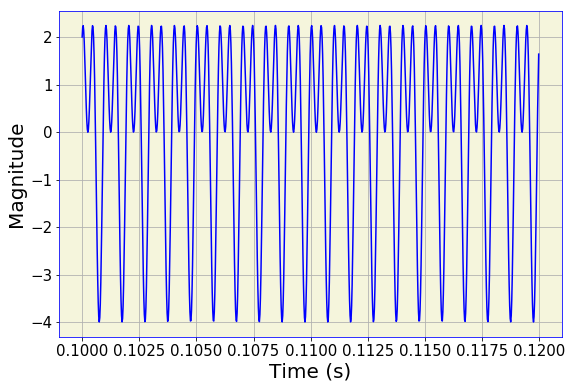

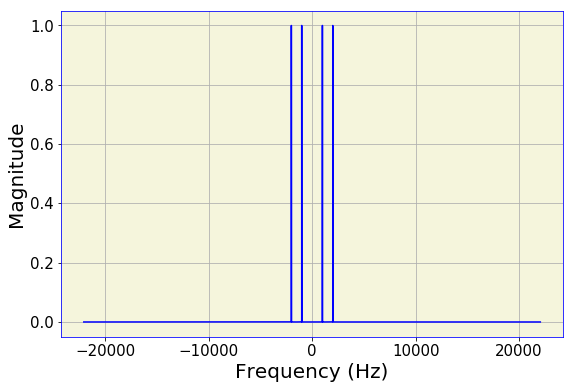

,Peak,Valley,Valley + Peak,duración
0,999.522665,22050.0,23049.522665,5.0


In [9]:
aud1.set_time(0.1,0.12)
aud1.plot_time()
aud1.plot_freq()
get_features(aud1)

Audio 2
---
En este caso se considera una función en el mismo intervalo que en la anterior,
solo que se altera la amplitud, período y frecuencia. En este caso en particular se puede apreciar
en el gráfico de tiempo como a pesar de tener el mismo intervalo de visión que en el caso anterior
el "ruido" es mucho mayor, debido al cambio de parámetros.

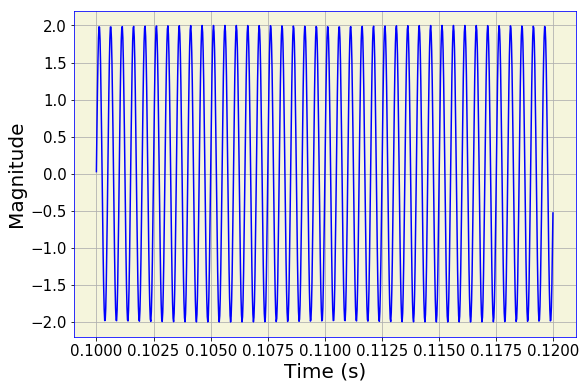

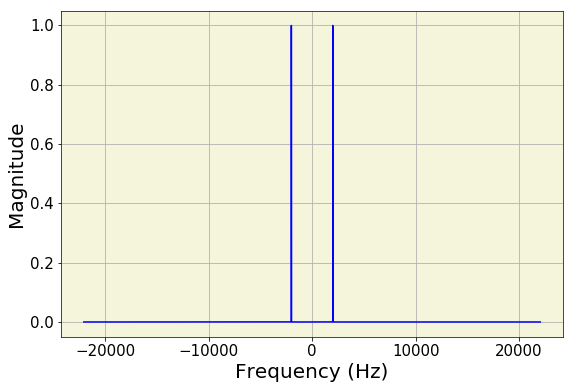

,Peak,Valley,Valley + Peak,duración
0,1999.545341,0.500011,2000.045353,2.0


In [33]:
aud2.set_time(0.1,0.12)
aud2.plot_time()
aud2.plot_freq()
get_features(aud2)

In [34]:
aud2.reset()
aud2.play()

Audio 3
--
En este archivo se puede como la señal constante se traga la otra señal, con un gran peak de frecuencia.

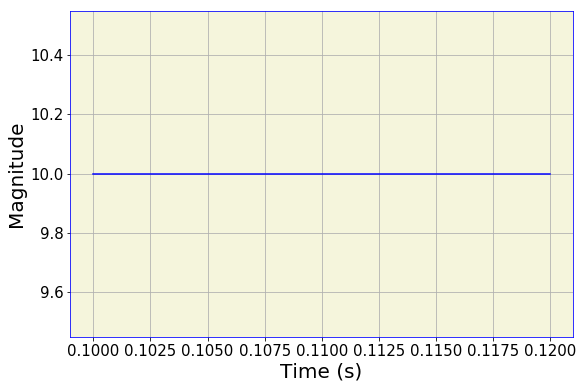

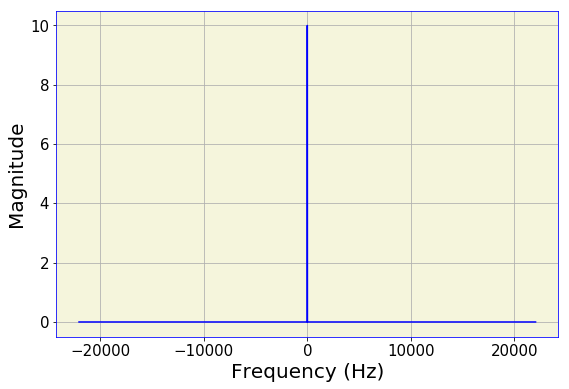

,Peak,Valley,Valley + Peak,duración
0,0.500011,22050.0,22050.500011,10.022676


In [35]:
aud3.set_time(0.1,0.12)
aud3.plot_time()
aud3.plot_freq()
get_features(aud3)

In [36]:
aud3.reset()
aud3.play()

Audio 4
--
En este caso se combina una señal cuadrada con una exponencial, es interesante notar como cambia el gráfico de tiempo de una señal típica cuadrada, además de el peak que alcanza en magnitud en frecuencia.

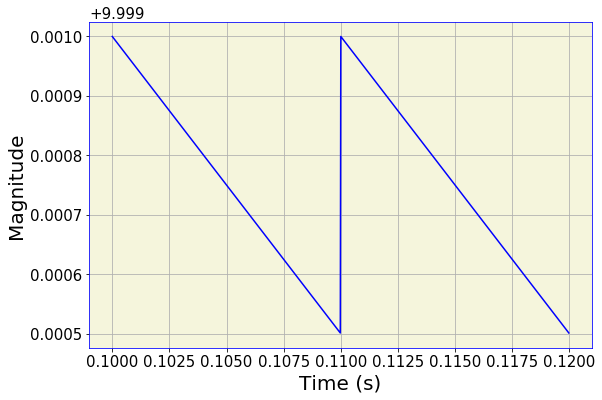

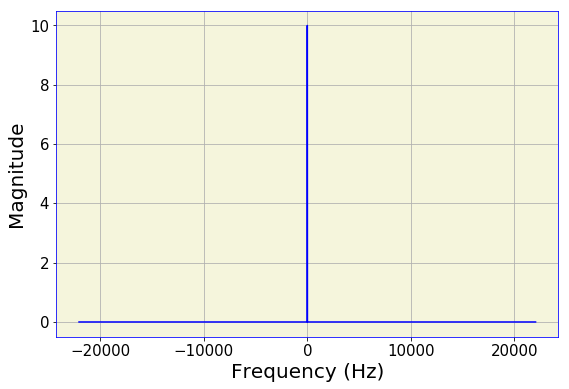

,Peak,Valley,Valley + Peak,duración
0,0.500011,22041.999819,22042.49983,5.0


In [37]:
aud4.set_time(0.1,0.12)
aud4.plot_time()
aud4.plot_freq()
get_features(aud4)

In [38]:
aud4.reset()
aud4.play()

Audio 5
--
Esta señal nace de la combinación de dos senos, se puede apreciar como se potencian ambas en los peaks de frecuencia y el "ruido" que generan en el gráfico de tiempo.

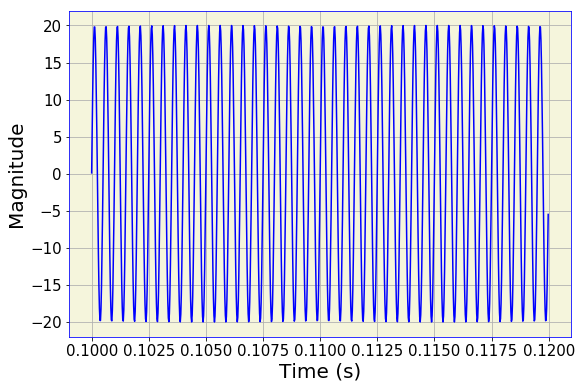

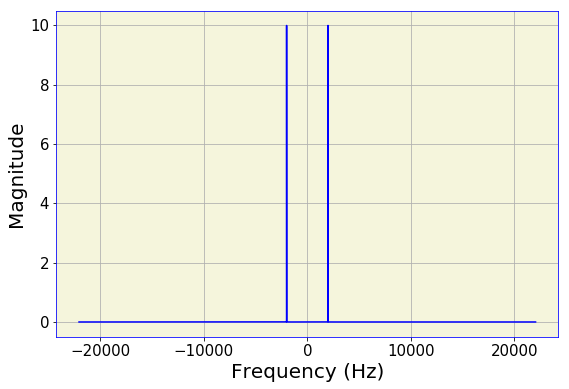

,Peak,Valley,Valley + Peak,duración
0,1999.545341,0.500011,2000.045353,5.0


In [39]:
aud5.set_time(0.1,0.12)
aud5.plot_time()
aud5.plot_freq()
get_features(aud5)

In [40]:
aud5.reset()
aud5.play()

Audio 6
---
Esta señal se genera a partir de un coseno más la suma de un ruido blanco, se puede apreciar que la forma de coseno pareciera estar, sin embargo el ruido es muy alto, es interesante además notar 4 peaks con una leve diferencia entre 2 v/s otros 2

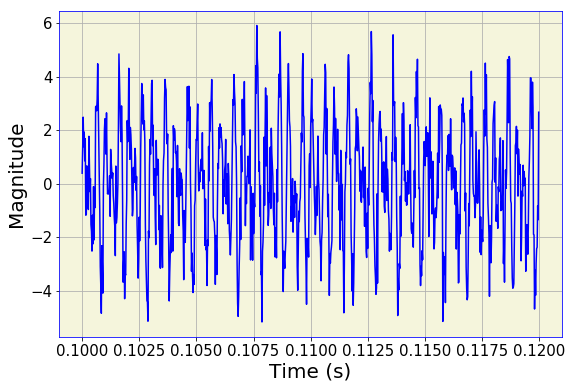

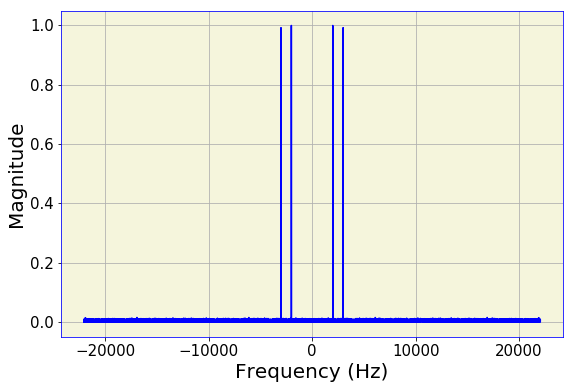

,Peak,Valley,Valley + Peak,duración
0,1999.545341,13038.795664,15038.341005,2.0


In [41]:
aud6.set_time(0.1,0.12)
aud6.plot_time()
aud6.plot_freq()
get_features(aud6)

In [42]:
aud6.reset()
aud6.play()

Audio 7
--
Esta señal nace del ruido blanco de una función cuadrada + exp y una exponencial, es interesante notar como el ruido blanco actúa sobre la función en general, manteniendo del resto de funciones probablemente la amplitud y el peak de frecuencia por la exponencial.

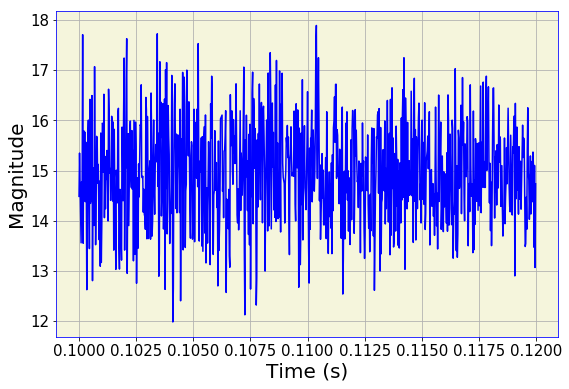

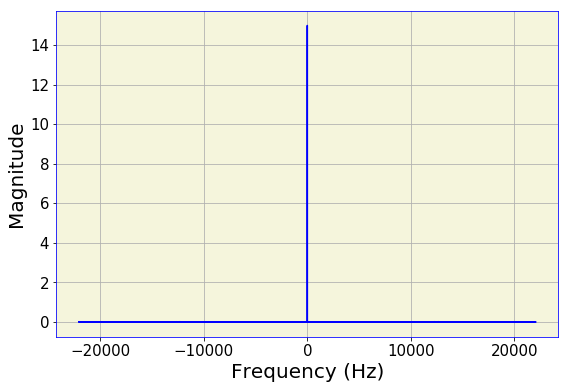

,Peak,Valley,Valley + Peak,duración
0,0.500011,5516.625094,5517.125105,5.0


In [43]:
aud7.set_time(0.1,0.12)
aud7.plot_time()
aud7.plot_freq()
get_features(aud7)

In [44]:
aud7.reset()
aud7.play()

Audio 8
--
Esta función es la composición de un seno y un ruido blanco, se puede notar claramente la forma sinusoidal ya que el ruido blanco aplicado es leve y no altera en gran parte la señal.

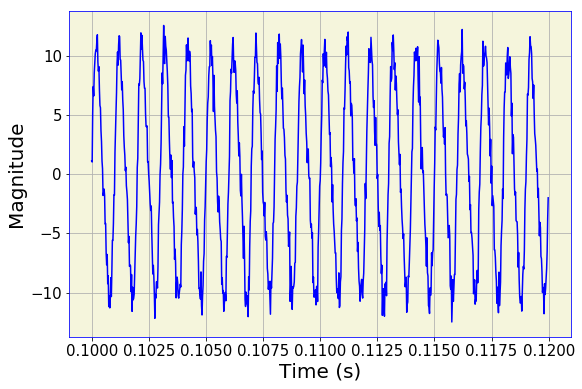

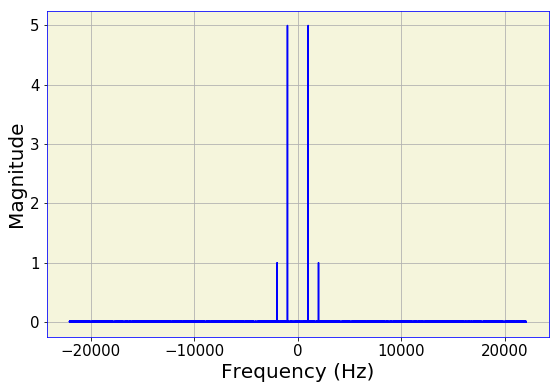

,Peak,Valley,Valley + Peak,duración
0,999.522665,10120.729495,11120.25216,2.0


In [45]:
aud8.set_time(0.1,0.12)
aud8.plot_time()
aud8.plot_freq()
aud8.play()
get_features(aud8)

In [46]:
aud8.reset()
aud8.play()

Audio 9
---
Este caso corresponde a una señal cuadrada más una exponencial, lo que genera una señal lineal en caída con un gran peak.

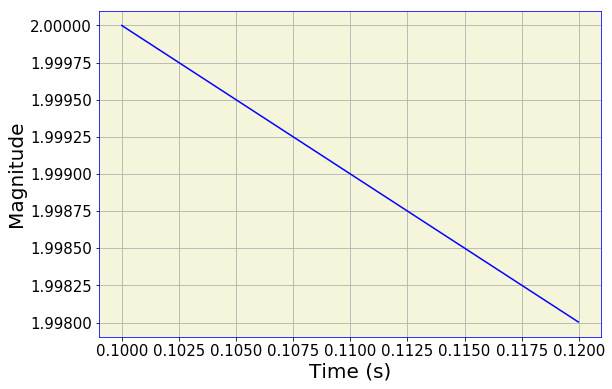

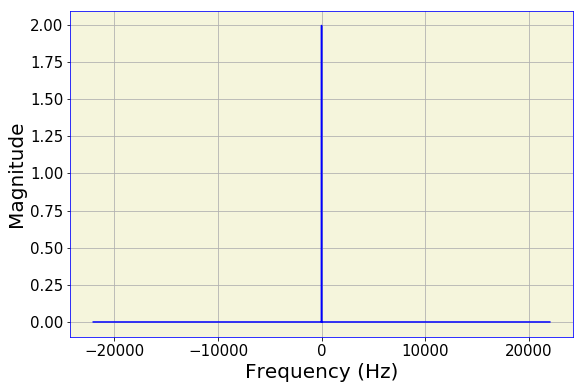

,Peak,Valley,Valley + Peak,duración
0,0.500011,22044.999887,22045.499898,5.0


In [47]:
aud9.set_time(0.1,0.12)
aud9.plot_time()
aud9.plot_freq()
get_features(aud9)

In [48]:
aud9.reset()
aud9.play()

Audio 10
---
Este audio corresponde a la combinación de: seno, coseno, ruido blanco y cuadrada. Es interesante notar que la forma pareciera tener cierta estacionalidad, sin embargo se ve un ruido aplicado en general por el conjunto de funciones que no permite discriminar bien la señal real.
Es interesante notar la forma de la frecuencia, que responde a una seudo normal, con dos peaks superiores a los costados.


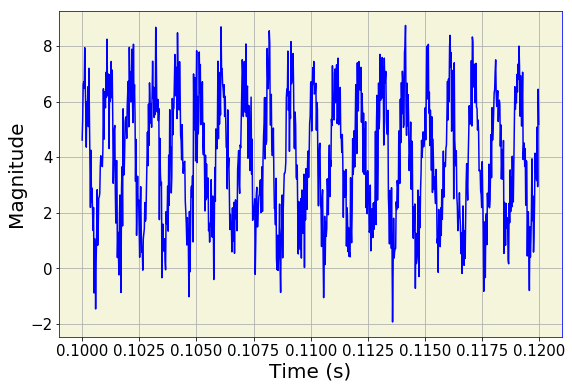

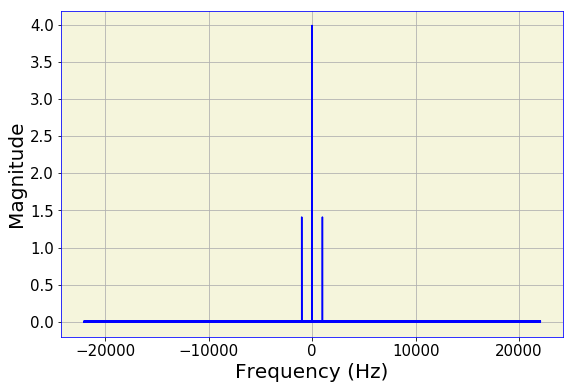

,Peak,Valley,Valley + Peak,duración
0,0.500011,8712.697567,8713.197578,5.0


In [49]:
aud10.set_time(0.1,0.12)
aud10.plot_time()
aud10.plot_freq()
get_features(aud10)

In [50]:
aud10.reset()
aud10.play()

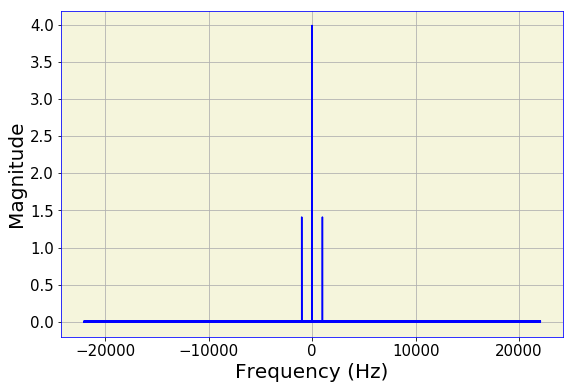

In [51]:
#Evaluar widget
audio=Audio(aud10)
widget(audio)

# Filtros

In [52]:
def filtro1(audio,A,f):
    freq=44100
    T=len(audio)/freq
    return audio + np.array(cuadrada(int(T),A,f))
def filtro2(audio,A,f):
    freq=44100
    T=len(audio)/freq
    return seno(int(T),A,f)+audio
def filtro3(audio,A,f):
    freq=44100
    T=len(audio)/freq
    return audio+exp(int(T),A,f)
def filtro4(audio, A, f):
    freq=44100
    T=len(audio)/freq
    return ruidoblanco(audio)*audio
def filtro5(audio,A,f):
    freq=44100
    T=len(audio)/freq
    return coseno(int(T),A,f)+ audio


In [53]:
#Aplicar filtros
audio_filtrado1= Audio(filtro1(aud1,10,1000))
audio_filtrado2= Audio(filtro1(aud2,5,400)) 
audio_filtrado3 = Audio(filtro4(aud3,5,5)) 
audio_filtrado4 = Audio(filtro2(aud4, 20, 100))
audio_filtrado5 = Audio(filtro3(filtro2(aud5,10,100),10,100))
audio_filtrado6 = Audio(filtro4(aud6,20,30))      
audio_filtrado7= Audio(filtro4(aud7,15,20))
audio_filtrado8= Audio(filtro5(aud8,3,4))   
audio_filtrado9 = Audio(filtro5(filtro3(aud9,10,10),10,10))
audio_filtrado10 = Audio(filtro3(filtro4(aud10,10,10),20,20))

# Visualización


Audio 1 Filtrado
---
A este gráfico se le aplica el filtro que suma una función cuadrada, lo que de alguna manera sugiere la forma que tiene a través del tiempo y como va de 6 a 12.

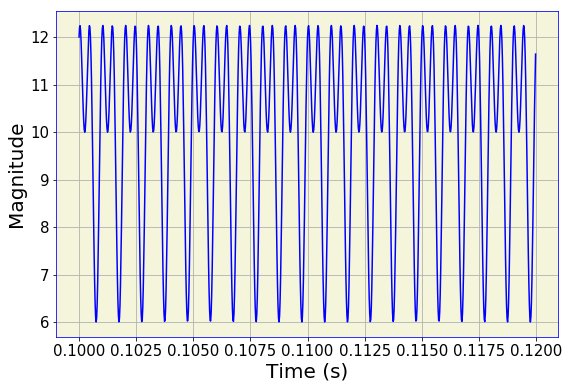

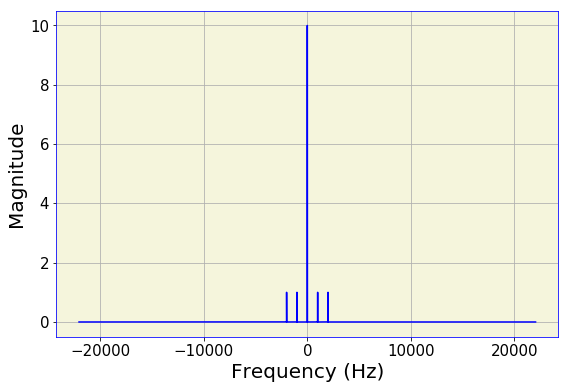

,Peak,Valley,Valley + Peak,duración
0,0.500011,22050.0,22050.500011,5.0


In [54]:
audio_filtrado1.set_time(0.1,0.12)
audio_filtrado1.plot_time()
audio_filtrado1.plot_freq()
get_features(audio_filtrado1)

In [55]:
audio_filtrado1.reset()
audio_filtrado1.play()

Audio 2 Filtrado
---

A este gráfico se le suma una función cuadrada, siendo bastante clara por su forma, muy parecida a la del anterior gráfico. La diferencia se explica por los parámetros entregados.

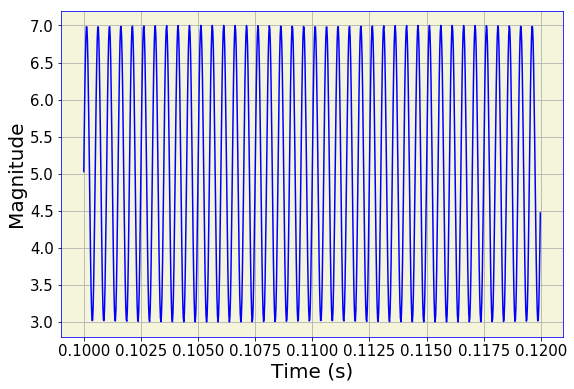

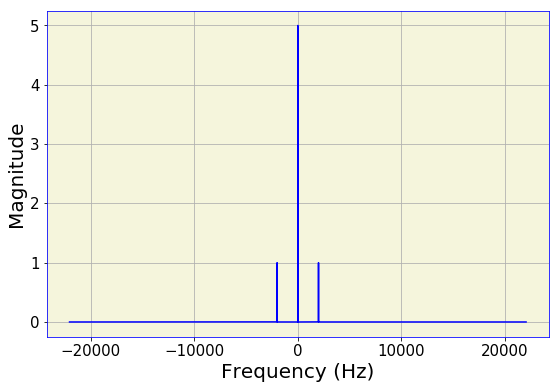

,Peak,Valley,Valley + Peak,duración
0,0.500011,22050.0,22050.500011,5.0


In [56]:
audio_filtrado2.set_time(0.1,0.12)
audio_filtrado2.plot_time()
audio_filtrado2.plot_freq()
get_features(audio_filtrado1)

In [57]:
audio_filtrado2.reset()
audio_filtrado2.play()

Audio 3 Filtrado
---
En este caso se aplica un filtro de ruido blanco, el cual es bastante explícito pues se puede ver claramente el ruido aplicado a la funcióno original.

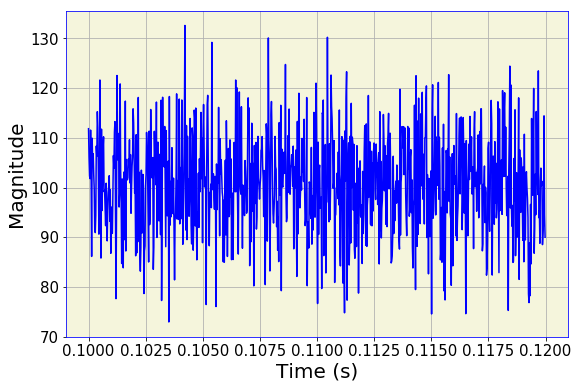

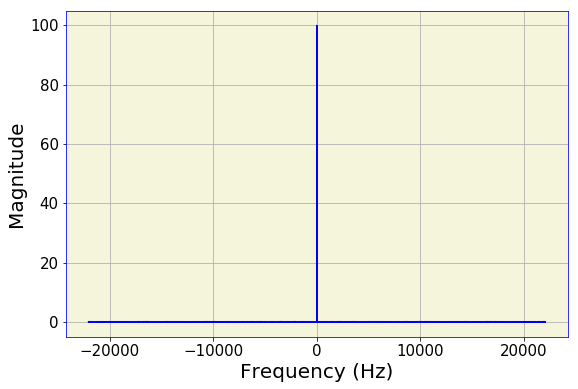

,Peak,Valley,Valley + Peak,duración
0,0.500011,22050.0,22050.500011,5.0


In [58]:
audio_filtrado3.set_time(0.1,0.12)
audio_filtrado3.plot_time()
audio_filtrado3.plot_freq()
get_features(audio_filtrado1)

In [59]:
audio_filtrado3.reset()
audio_filtrado3.play()

Audio 4 filtrado
---

A esta función se le aplica un filtro sinosoidal, siendo también bastante claro a la vista por la forma de la función.

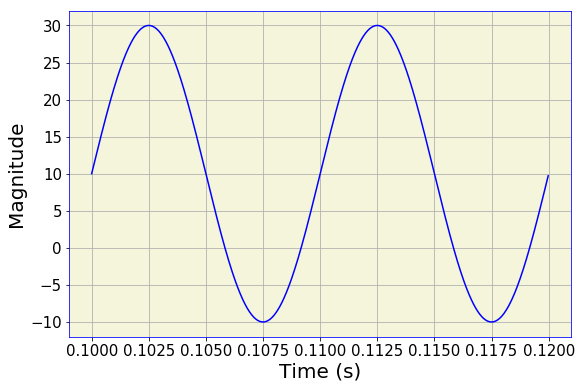

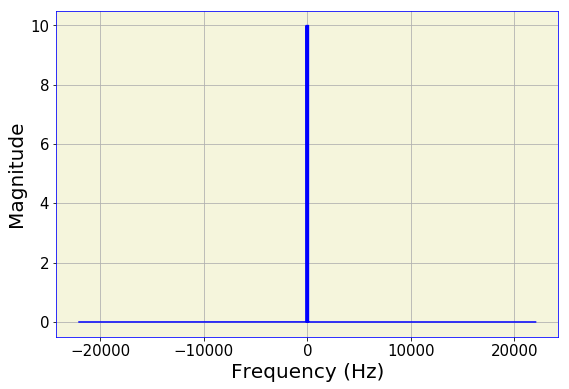

,Peak,Valley,Valley + Peak,duración
0,0.500011,22050.0,22050.500011,5.0


In [60]:
audio_filtrado4.set_time(0.1,0.12)
audio_filtrado4.plot_time()
audio_filtrado4.plot_freq()
get_features(audio_filtrado1)

In [61]:
audio_filtrado4.reset()
audio_filtrado4.play()

Audio 5 Filtrado
---

Este audio se genera por una combinación de dos filtros: por un lado claramente el sinusoidal y luego y el exponencial. Es la combinación de ambos lo que genera la forma especial de este gráfico, ya que los conjuntos de curvas se comportan como clusters que sigan una forma dada.

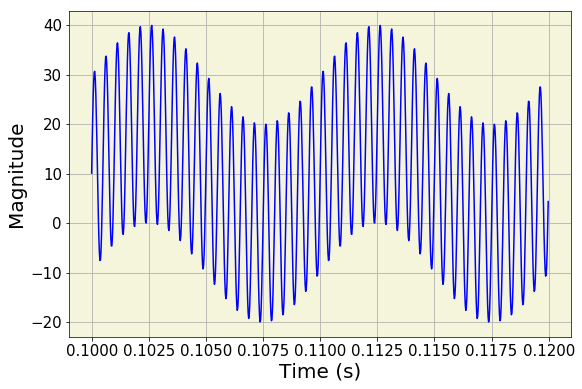

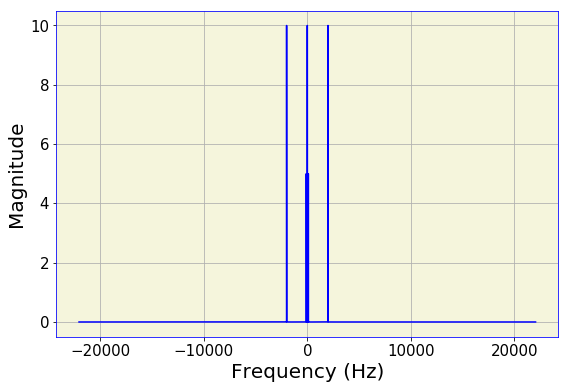

,Peak,Valley,Valley + Peak,duración
0,0.500011,22050.0,22050.500011,5.0


In [62]:
audio_filtrado5.set_time(0.1,0.12)
audio_filtrado5.plot_time()
audio_filtrado5.plot_freq()
get_features(audio_filtrado1)

In [63]:
audio_filtrado5.reset()
audio_filtrado5.play()

Audio 6 Filtrado
----

A este audio se le aplica un filtro de ruido, lo que explica la forma que tiene: "ruidosa"

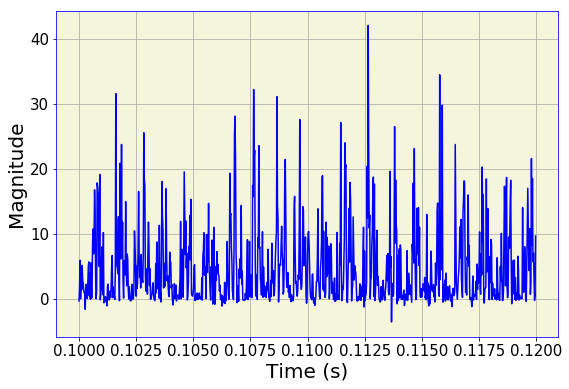

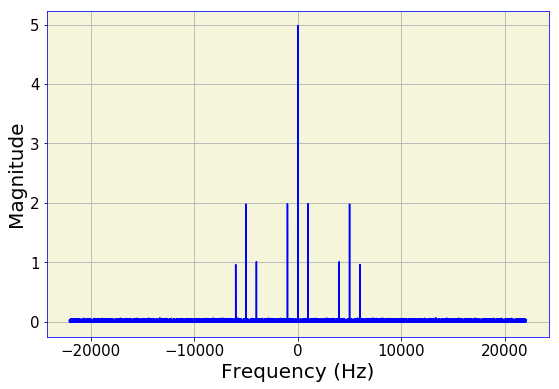

,Peak,Valley,Valley + Peak,duración
0,0.500011,22050.0,22050.500011,5.0


In [64]:
audio_filtrado6.set_time(0.1,0.12)
audio_filtrado6.plot_time()
audio_filtrado6.plot_freq()
get_features(audio_filtrado1)

In [65]:
audio_filtrado6.reset()
audio_filtrado6.play()

Audio 7 Filtrado
----

De manera igual que el gráfico anterior, a este audio se le aplica un ruido blanco, la diferencia en las formas se debe a la función original que tienen, sin embargo lo ruidoso se mantiene.

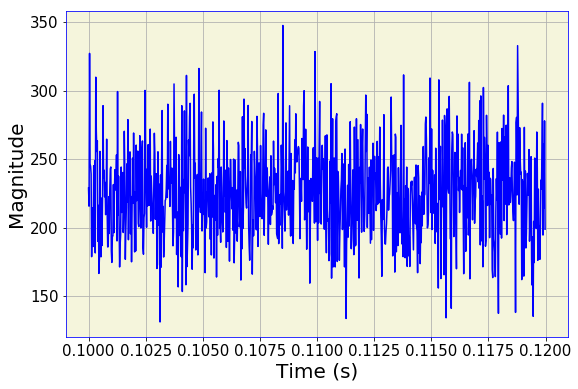

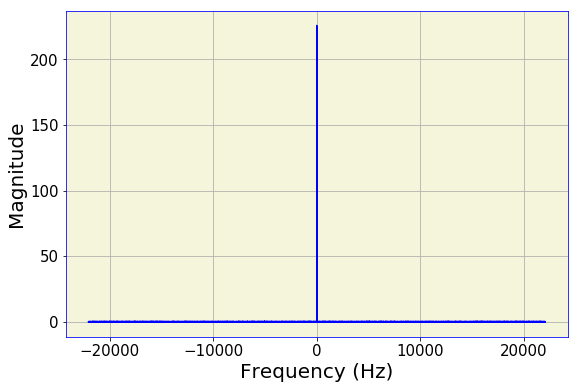

,Peak,Valley,Valley + Peak,duración
0,0.500011,22050.0,22050.500011,5.0


In [29]:
audio_filtrado7.set_time(0.1,0.12)
audio_filtrado7.plot_time()
audio_filtrado7.plot_freq()
get_features(audio_filtrado1)

In [ ]:
audio_filtrado7.reset()
audio_filtrado7.play()

Audio 8 Filtrado
---

De manera similar a los gráficos a los cuales se les aplica un seno, en este caso se aplica un coseno, lo que da una forma muy similar.

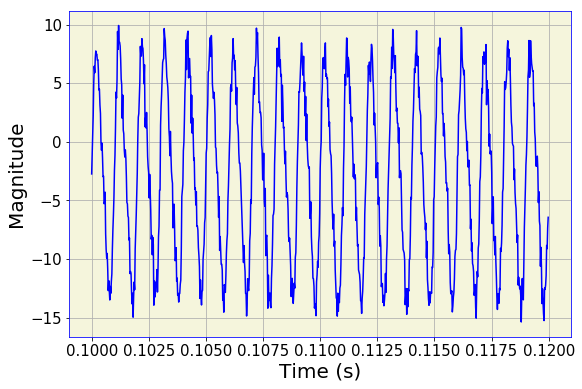

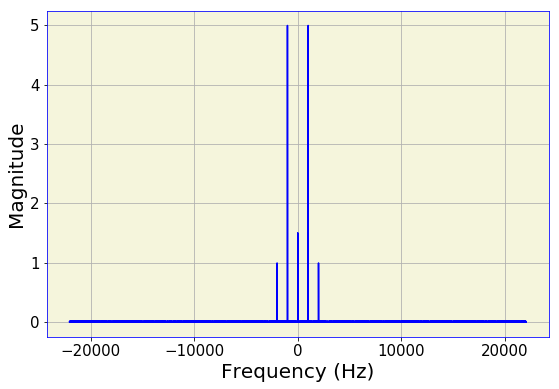

,Peak,Valley,Valley + Peak,duración
0,0.500011,22050.0,22050.500011,5.0


In [30]:
audio_filtrado8.set_time(0.1,0.12)
audio_filtrado8.plot_time()
audio_filtrado8.plot_freq()
get_features(audio_filtrado1)

In [ ]:
audio_filtrado8.reset()
audio_filtrado8.play()

Audio 9 Filtrado
----

La forma de este gráfico se obtiene primero al aplicar un filtro exponencial, y luego un filtro de coseno. El primero da la forma de exponencial claramente, y el segundo "recorta" este trozo de la función.

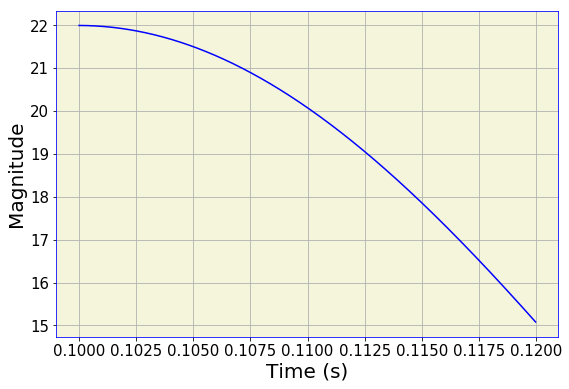

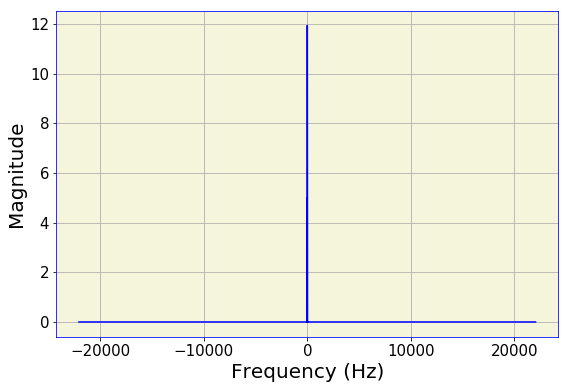

,Peak,Valley,Valley + Peak,duración
0,0.500011,22050.0,22050.500011,5.0


In [31]:
audio_filtrado9.set_time(0.1,0.12)
audio_filtrado9.plot_time()
audio_filtrado9.plot_freq()
get_features(audio_filtrado1)

In [ ]:
audio_filtrado9.reset()
audio_filtrado9.play()

Audio 10 Filtrado
---
Este audio se obtiene al filtrar primero por un ruido blanco, y luego sumarle una exponencial.
El ruido blanco es claramente notorio por la forma del gráfico, la exponencial por otro lado es lo que suaviza el ruido a través del tiempo.

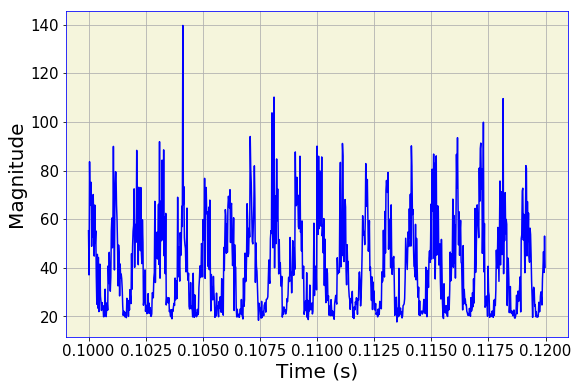

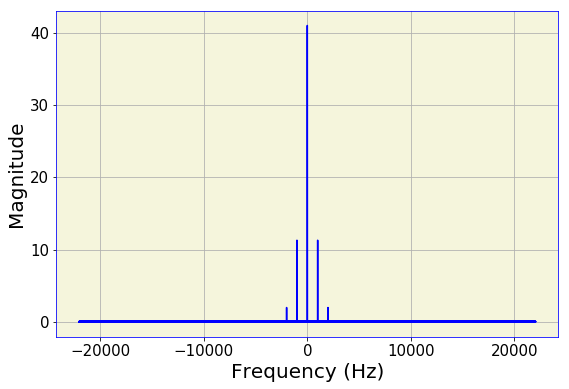

,Peak,Valley,Valley + Peak,duración
0,0.500011,22050.0,22050.500011,5.0


In [ ]:
audio_filtrado10.set_time(0.1,0.12)
audio_filtrado10.plot_time()
audio_filtrado10.plot_freq()
get_features(audio_filtrado1)

In [ ]:
audio_filtrado10.reset()
audio_filtrado10.play()

Evaluar con archivos de audio reales
---

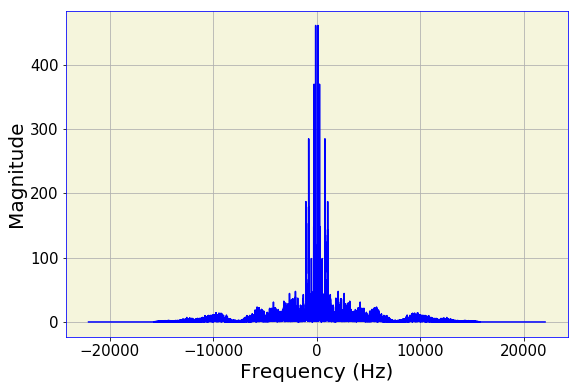

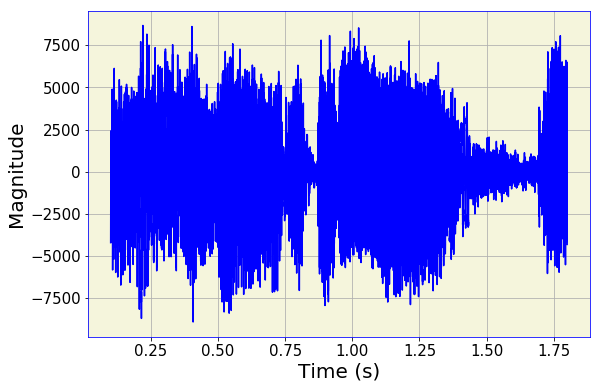

In [66]:
audio=load('canto.wav')
widget(audio)

In [67]:
get_features(audio)

,Peak,Valley,Valley + Peak,duración
0,111.502528,6465.646613,6577.149142,5.0


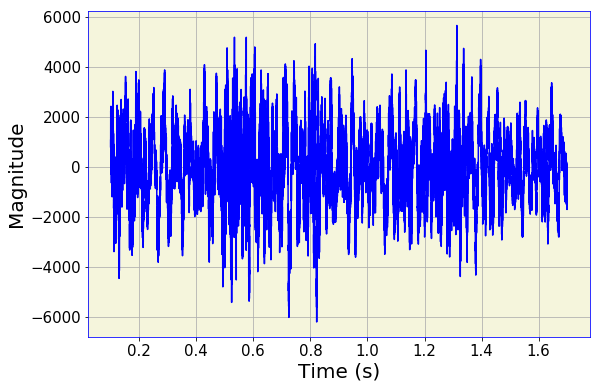

In [10]:
audio=load('instrumental.wav')
widget(audio)

Descripción
---

De los dos audios anteriores, se puede ver que el canto tiene un rango más amplio de magnitud a través del tiempo, a pesar de que el sonido de quien canta no tiene grandes diferencias, lo que sugiere que el canto de las personas en general tiene mayor varianza en magnitud a través del tiempo que en instrumentos.
Por otro lado es interesante notar que la frecuencia alcanzada en el canto es mayor que en los instrumentos.s

Anexo
---

In [37]:
class Audio(object):
    def __init__(self, x):
        freq=44100
        N=44100
        #Seteo inicial
        self.x= x
        #Tiempo de duración de la señal
        self.t= np.linspace(0, len(self.x)/freq, len(self.x))
        #Aplicar Transformada de Fourier
        transform = fft.fft(self.x,N)/N  
        magTransform = abs(transform)
        self.faxis = np.linspace(-freq/2,freq/2,freq)#Generar valores para coordenada x
        self.y=fft.fftshift(magTransform) #Generar valores para ordenada
        self.faxis2=self.faxis #Guardar valores para el reset
        self.y2=self.y
    
    def __len__(self):
        return len(self.x)
    def __str__(self):
        return str(self.x)
    def __getitem__(self,i):
        return self.x[i]
    
    def plot_time(self):
        freq=44100
        #Probar con valor "cambiado" si existe, sino, con el original
        try:
            t2=self.t2
            x2=self.x2
        except AttributeError:
            t2=self.t
            x2=self.x
        plt.plot(t2,x2)  #Generar plot
        plt.xlabel('Time (s)')
        plt.ylabel('Magnitude')
        plt.show()
        
    def plot_freq(self):
        freq=44100
        #Probar con valor "cambiado" si existe, sino, con el original
        try:
            faxis=self.faxis2
            n=self.y2
        except AttributeError:
            faxis=self.faxis2
            n=self.y2
        #Plot
        plt.plot(faxis, n)
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Magnitude')
        plt.show()
        
    def save_time(self):
        freq=44100
        #Función para guardar el plot_time
        plt.plot(self.t,self.x) 
        plt.xlabel('Time (s)')
        plt.ylabel('Magnitude')
        plt.ioff()
        plt.savefig('plot_time.png')
        
    def save_freq(self):
        freq=44100
        #Función para guardar el plot_freq
        plt.plot(self.faxis, self.y)
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Magnitude')
        plt.ioff()
        plt.savefig('plot_freq.png')
      
    def set_time(self, a, b):
        freq=44100
        if a<min(self.t):
            return print("Intente con un valor más grande")
        if b>max(self.t):
            return print("Intente con un valor más pequeño")
        if a>b:
            return print("Valor inicial mayor que final")
        else:
            #Setear valores
            self.t2 = self.t[int(a*freq):int(b*freq)]
            self.x2 = self.x[int(a*freq):int(b*freq)]

    def set_freq(self,a,b):
        freq=44100
        if a<min(self.faxis):
            return print("Intente con un valor más grande")
        if b>max(self.faxis):
            return print("Intente con un valor más pequeño")
        if a>b:
            return print("Valor inicial mayor que final")
        else:
            a=a-min(self.faxis)
            b=b-min(self.faxis)
            self.faxis2 = self.faxis[int(a):int(b)]
            self.y2 = self.y[int(a):int(b)] 

    def reset(self):
        self.t2 = self.t
        self.x2 = self.x
        self.faxis2 = self.faxis
        self.y2 = self.y
    def save(self, name):
        freq=44100
        return write(name, freq, self.x)
 
    def play(self, volume=0.3):
        freq=44100
        try:
            samples=self.x2
        except AttributeError:
            samples=self.x
        lista = []
        lista.append(samples)
        lista = np.concatenate(lista)*volume
        stream = pyaudio.PyAudio().open(format=pyaudio.paFloat32, channels=1, rate=freq, output=1)
        return stream.write(lista.astype(np.float32).tostring())      